In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Loading the dataset

df = pd.read_csv("C:\\Users\\lenovo\\Downloads\\dataset_pric.csv")

In [3]:
df.head()

,site_id,hour_of_day,timestamp,region,contract_type,asset_type,day_of_week,is_ooh,energy_usage_kWh,occupancy_level,...,unit_rate_billed,total_cost,revenue,margin,suggested_price,experiment_group,expected_margin,margin_ci_lower,margin_ci_upper,future_margin
0,Morrisons_Colchester,0,2022-12-31 23:53:00,SoUth,fixed,Solar Panel Inverter,Sunday,1,25.542537,0.376486,...,0.1197,2.20967,3.057451,0.847781,0.115863,ooh_surcharge,0.304714,-3.097872,3.707301,0.207421
1,Morrisons_Colchester,1,2023-01-01 00:53:00,South,fixed,Solar Panel Inverter,NaN,1,0.000000,0.000000,...,0.0000,0.00000,0.000000,0.000000,0.000000,ooh_surcharge,NaN,0.000000,0.000000,1.324423
2,Morrisons_Colchester,2,2023-01-01 01:48:00,South,fixed,Solar Panel Inverter,NaN,1,0.000000,0.000000,...,0.0000,0.00000,0.000000,0.000000,0.000000,ooh_surcharge,0.000000,0.000000,0.000000,-1.186385
3,Morrisons_Colchester,3,2023-01-01 02:48:00,South,fixed,Solar Panel Inverter,NaN,1,0.000000,0.000000,...,0.0000,0.00000,0.000000,0.000000,0.000000,ooh_surcharge,0.000000,0.000000,0.000000,0.371162
4,Morrisons_Colchester,4,2023-01-01 04:03:00,South,fixed,Solar Panel Inverter,NaN,1,0.000000,0.000000,...,0.0000,0.00000,0.000000,0.000000,0.000000,ooh_surcharge,0.000000,0.000000,0.000000,0.844827


In [4]:
df.shape

(37814, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37814 entries, 0 to 37813
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   site_id              37814 non-null  object 
 1   hour_of_day          37814 non-null  int64  
 2   timestamp            37814 non-null  object 
 3   region               37814 non-null  object 
 4   contract_type        37436 non-null  object 
 5   asset_type           37436 non-null  object 
 6   day_of_week          8536 non-null   object 
 7   is_ooh               37814 non-null  int64  
 8   energy_usage_kWh     37078 non-null  float64
 9   occupancy_level      37075 non-null  float64
 10  temperature_C        37035 non-null  float64
 11  supply_cost_per_kWh  37070 non-null  float64
 12  unit_rate_billed     37074 non-null  float64
 13  total_cost           37062 non-null  float64
 14  revenue              37020 non-null  float64
 15  margin               37085 non-null 

In [6]:
# Timestamp range sanity check
print("Time range:", df["timestamp"].min(), "to", df["timestamp"].max())

Time range: 2022-12-31 23:53:00 to 2023-06-29 23:12:00


In [7]:
# Checking for unique values in Region and Contract_type
print("Unique Regions:", df["region"].unique())

Unique Regions: ['SoUth' 'South' 'SOUTH' ' NoRth ' 'North' 'EAST' 'north' 'NORTH' 'East'
 '  east ' 'south' 'west' 'West' 'weSt' 'east' 'WEST']


In [8]:
print("Unique contract types:", df["contract_type"].unique())

Unique contract types: ['fixed' 'variable' nan]


In [9]:
# Clean and Normalise Categorical Columns
df["region"] = df["region"].str.strip().str.lower().str.title()
df["contract_type"] = df["contract_type"].str.strip().str.lower()

In [10]:
# Check updated unique values for 'region'
print("Unique regions after normalization:")
print(df["region"].unique())

# Check updated unique values for 'contract_type'
print("\nUnique contract types after normalization:")
print(df["contract_type"].unique())

Unique regions after normalization:
['South' 'North' 'East' 'West']

Unique contract types after normalization:
['fixed' 'variable' nan]


In [11]:
# Checking Missing Values
print("Total missing Values:", df.isnull().sum().sum()) # total missing values

#Missing values per column
print("\n Missing values per column:")
print(df.isnull().sum())


Total missing Values: 39821

 Missing values per column:
site_id                    0
hour_of_day                0
timestamp                  0
region                     0
contract_type            378
asset_type               378
day_of_week            29278
is_ooh                     0
energy_usage_kWh         736
occupancy_level          739
temperature_C            779
supply_cost_per_kWh      744
unit_rate_billed         740
total_cost               752
revenue                  794
margin                   729
suggested_price          726
experiment_group           0
expected_margin          782
margin_ci_lower          777
margin_ci_upper          760
future_margin            729
dtype: int64


In [12]:
# Repair Missing Values
# Step 1: Rebuild day_of_week from timestamp
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["day_of_week"] = df["timestamp"].dt.day_name()

In [13]:
#Step 2: Fill missing categorical values with mode
categorical_cols = ["contract_type", "asset_type"]
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode().iloc[0]
        print(f"Filling missing '{col}' with mode: {mode_val}")
        df[col] = df[col].fillna(mode_val)
        

Filling missing 'contract_type' with mode: variable
Filling missing 'asset_type' with mode: Auto Door System


In [14]:
#Step 3: Fill numeric columns with median
numeric_cols = [
    "energy_usage_kWh", "occupancy_level", "temperature_C", "supply_cost_per_kWh", 
    "unit_rate_billed", "total_cost", "revenue", "margin", "suggested_price", 
    "expected_margin", "margin_ci_lower", "margin_ci_upper", "future_margin"
]

for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        print(f"Filling missing '{col}' with median: {median_val}")
        df[col] = df[col].fillna(median_val)

Filling missing 'energy_usage_kWh' with median: 0.0
Filling missing 'occupancy_level' with median: 0.0
Filling missing 'temperature_C' with median: 0.0
Filling missing 'supply_cost_per_kWh' with median: 0.0
Filling missing 'unit_rate_billed' with median: 0.0
Filling missing 'total_cost' with median: 0.0
Filling missing 'revenue' with median: 0.0
Filling missing 'margin' with median: 0.0
Filling missing 'suggested_price' with median: 0.0
Filling missing 'expected_margin' with median: 0.0
Filling missing 'margin_ci_lower' with median: 0.0
Filling missing 'margin_ci_upper' with median: 0.0
Filling missing 'future_margin' with median: 0.2224796569726246


In [15]:
# Step 4: Final Check for any remaining missing values
print("\n Final Missing values check:")
print(df.isnull().sum())


 Final Missing values check:
site_id                0
hour_of_day            0
timestamp              0
region                 0
contract_type          0
asset_type             0
day_of_week            0
is_ooh                 0
energy_usage_kWh       0
occupancy_level        0
temperature_C          0
supply_cost_per_kWh    0
unit_rate_billed       0
total_cost             0
revenue                0
margin                 0
suggested_price        0
experiment_group       0
expected_margin        0
margin_ci_lower        0
margin_ci_upper        0
future_margin          0
dtype: int64


In [16]:
# Step 6: Drop rows with zero usage, revenue, and margin — likely invalid or non-informative records
# These rows may represent sensor errors, downtime, or placeholder data that can distort modeling.
core_fields = [
    "energy_usage_kWh", "supply_cost_per_kWh", "unit_rate_billed",
    "total_cost", "revenue", "margin"
]

# Check how many rows would be lost
print("❗ Missing values in core fields:")
print(df[core_fields].isnull().sum())

df_clean = df.dropna(subset=core_fields)

❗ Missing values in core fields:
energy_usage_kWh       0
supply_cost_per_kWh    0
unit_rate_billed       0
total_cost             0
revenue                0
margin                 0
dtype: int64


In [17]:
#Apply Final Clean Pipeline
# Drop rows where everything is zero (possible sensor corruption or test rows)
zero_mask = (
    (df_clean["energy_usage_kWh"] == 0) &
    (df_clean["revenue"] == 0) &
    (df_clean["margin"] == 0)
)
df_clean = df_clean[~zero_mask]

print(f"\n Final cleaned dataset shape: {df_clean.shape}")


 Final cleaned dataset shape: (8536, 22)


# Exploratory Data Analysis

Does the margin vary significantly by time or OOH status?

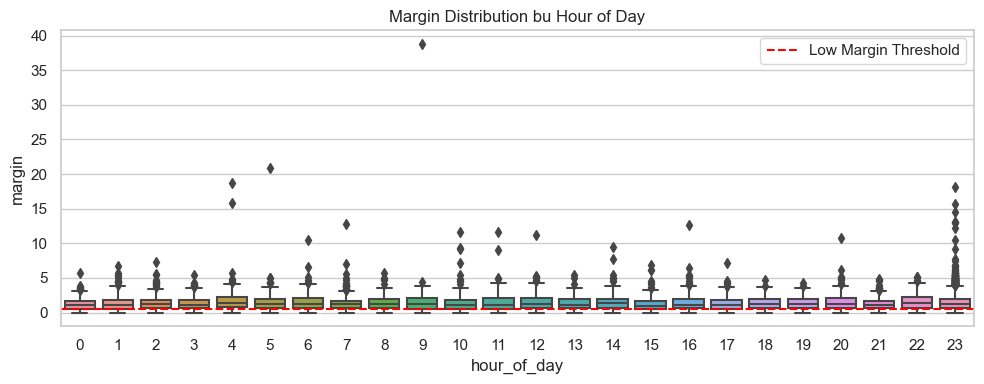

In [18]:
#Plotting margin by hour_of_day
# Set style
sns.set(style="whitegrid")

plt.figure(figsize = (10, 4))
sns.boxplot(data = df_clean, x = "hour_of_day", y = "margin")
plt.axhline(0.5, color = "red", linestyle = "--", label = "Low Margin Threshold")
plt.title("Margin Distribution bu Hour of Day")
plt.legend()
plt.tight_layout()
plt.show()

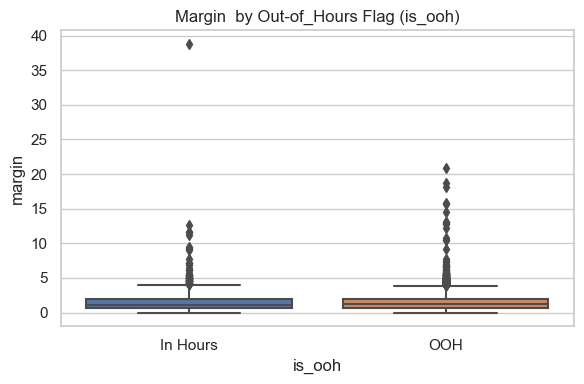

In [19]:
# Margin by OOH
plt.figure(figsize = (6, 4))
sns.boxplot(data = df_clean, x = "is_ooh", y = "margin")
plt.xticks([0, 1], ["In Hours", "OOH"])
plt.title("Margin  by Out-of_Hours Flag (is_ooh)")
plt.tight_layout()
plt.show()

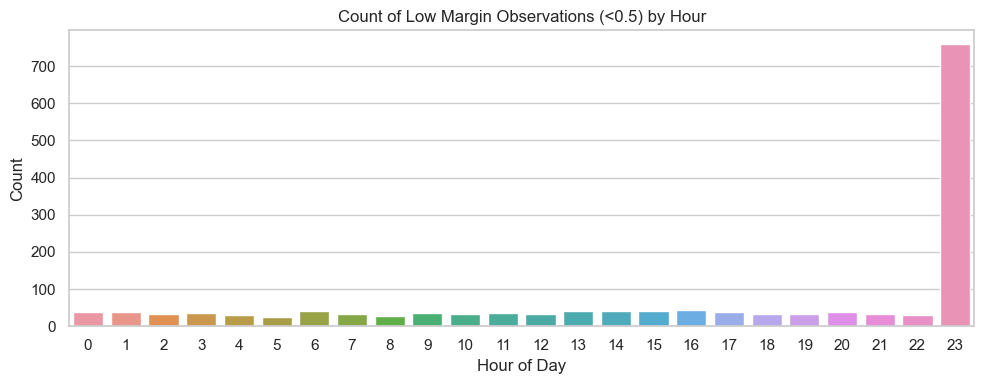

In [20]:
# Count of Low-Margin Hours
# Count how often margin drops below threshold by hour
low_margin_by_hour = df_clean[df_clean["margin"] < 0.5]["hour_of_day"].value_counts().sort_index()

plt.figure(figsize = (10, 4))
sns.barplot(x = low_margin_by_hour.index, y = low_margin_by_hour.values)
plt.title("Count of Low Margin Observations (<0.5) by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Segment based Margin Risk

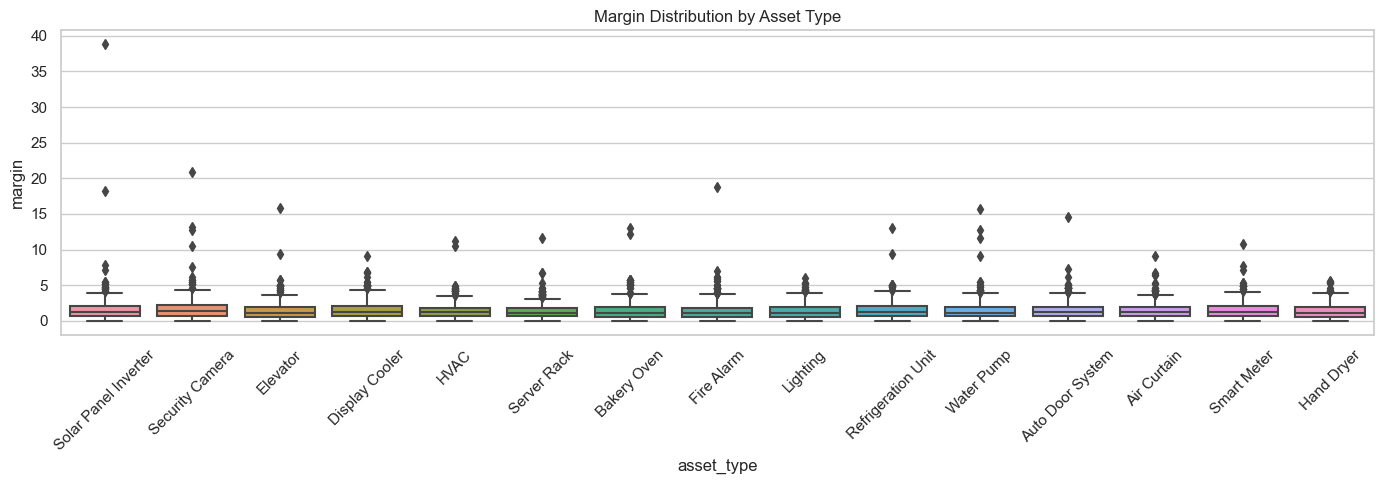

In [21]:
# Margin by asset_type
plt.figure(figsize = (14, 5))
sns.boxplot(data = df_clean, x = "asset_type", y = "margin")
plt.xticks(rotation = 45)
plt.title("Margin Distribution by Asset Type")
plt.tight_layout()
plt.show()

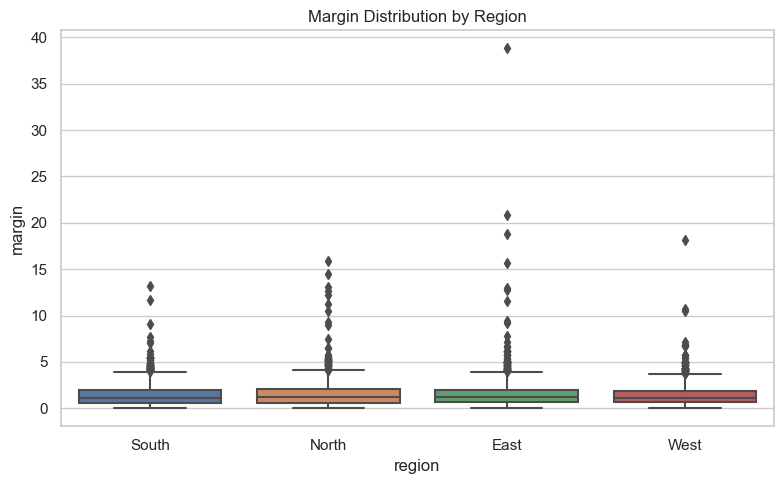

In [22]:
# Margin by region
plt.figure(figsize = (8, 5))
sns.boxplot(data = df_clean, x = "region", y = "margin")
plt.title("Margin Distribution by Region")
plt.tight_layout()
plt.show()

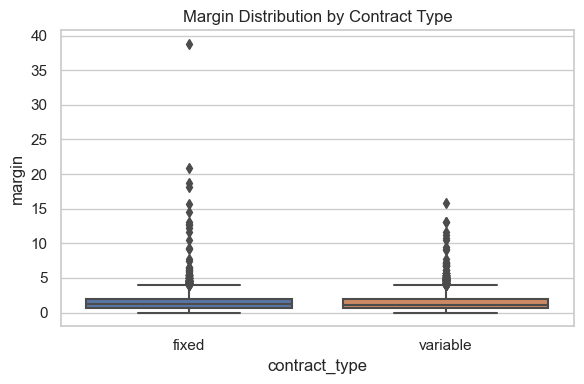

In [23]:
# Margin by contract_type
plt.figure(figsize = (6, 4))
sns.boxplot(data = df_clean, x = "contract_type", y = "margin")
plt.title("Margin Distribution by Contract Type")
plt.tight_layout()
plt.show()

In [24]:
# Rolling Volatility of Margin
# Measure how much margin fluctuates per site across time (useful to tag high risk sites)

# Sort by site and time
df_clean = df_clean.sort_values(by = ["site_id", "timestamp"])

#Rolling 3 hour standard deviation of margin per site
df_clean["rolling_margin_std_3h"] = (df_clean.groupby("site_id")["margin"].rolling(window = 3, min_periods = 1).std().reset_index(level = 0, drop = True))

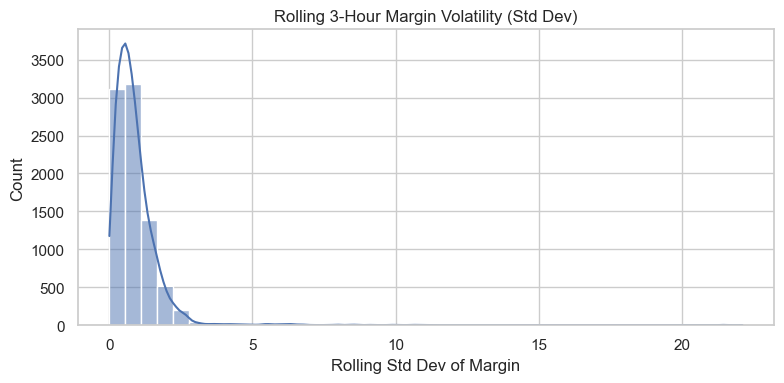

In [25]:
#Visualise Volatility Distribution
plt.figure(figsize =  (8, 4))
sns.histplot(df_clean["rolling_margin_std_3h"], bins = 40, kde = True)
plt.title("Rolling 3-Hour Margin Volatility (Std Dev)")
plt.xlabel("Rolling Std Dev of Margin")
plt.tight_layout()
plt.show()

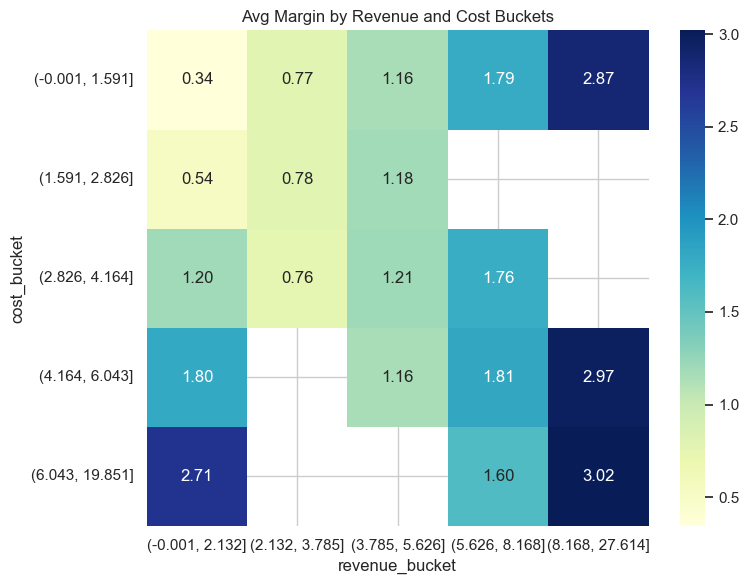

In [26]:
# Revenue Vs Cost Heatmap
#Bucket total cost and revenue
df_clean["cost_bucket"] = pd.qcut(df_clean["total_cost"], q = 5, duplicates = 'drop')
df_clean["revenue_bucket"] = pd.qcut(df_clean["revenue"], q = 5, duplicates = 'drop')

#Create Pivot table
pivot = df_clean.pivot_table(
    index = "cost_bucket",
    columns = "revenue_bucket",
    values = "margin",
    aggfunc = "mean"
)

#Heatmap Plot
plt.figure(figsize = (8, 6))
sns.heatmap(pivot, annot = True, fmt = ".2f", cmap = "YlGnBu")
plt.title("Avg Margin by Revenue and Cost Buckets")
plt.tight_layout()
plt.show()

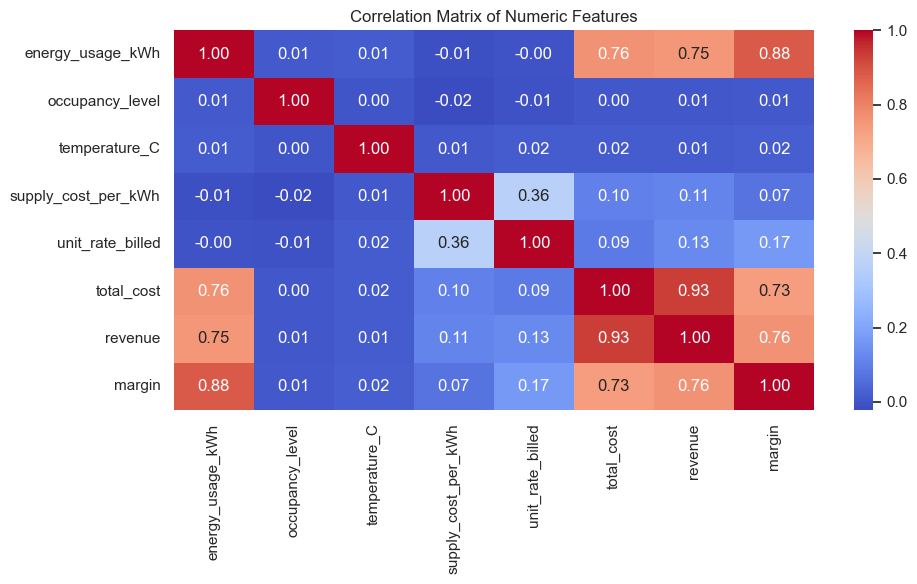

In [27]:
#Correlation Matrix
num_cols = [
    "energy_usage_kWh", "occupancy_level", "temperature_C",
    "supply_cost_per_kWh", "unit_rate_billed", "total_cost",
    "revenue", "margin"
]

plt.figure(figsize = (10, 6))
sns.heatmap(df_clean[num_cols].corr(), annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

# Feature Engineering

In [28]:
# Margin Efficiency
df_clean["margin_ratio"] = df_clean["margin"] / (df_clean["total_cost"] + 1e-5)

#Usage behaviour: energy per occupant
df_clean["usage_per_occupant"] = df_clean["energy_usage_kWh"] / (df_clean["occupancy_level"] + 1e-3)

# Risk Flag: OOH and low margin
df_clean["high_risk_flag"] = ((df_clean["is_ooh"] == 1) & (df_clean["margin"] < 0.5)).astype(int)

# Already Computer Earlier, but re-checking
df_clean["rolling_usage_std_3h"] = (
    df_clean.sort_values(["site_id", "timestamp"])
    .groupby("site_id")["energy_usage_kWh"]
    .rolling(window = 3, min_periods = 1).std()
    .reset_index(level = 0, drop = True)
)

# Hour Buckets
def bucket_hour(hour):
    if 0 <= hour < 6:
        return "night"
    elif 6 <= hour < 12:
        return "morning"
    elif 12 <= hour < 18:
        return "afternoon"
    else:
        return "evening"
    

df_clean["hour_bucket"] = df_clean["hour_of_day"].apply(bucket_hour)

In [29]:
# Verification after creating new features and checking for NaN
new_features = [
    "margin_ratio",
    "usage_per_occupant",
    "high_risk_flag",
    "rolling_usage_std_3h",
    "hour_bucket"
]

# Check for existence and nulls
df_clean[new_features].info()
print("\n Null Counts:")
print(df_clean[new_features].isnull().sum())

#Quick check: preview few rows
df_clean[new_features].sample(5, random_state = 42)

<class 'pandas.core.frame.DataFrame'>
Index: 8536 entries, 14051 to 28078
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   margin_ratio          8536 non-null   float64
 1   usage_per_occupant    8536 non-null   float64
 2   high_risk_flag        8536 non-null   int32  
 3   rolling_usage_std_3h  8528 non-null   float64
 4   hour_bucket           8536 non-null   object 
dtypes: float64(3), int32(1), object(1)
memory usage: 366.8+ KB

 Null Counts:
margin_ratio            0
usage_per_occupant      0
high_risk_flag          0
rolling_usage_std_3h    8
hour_bucket             0
dtype: int64


,margin_ratio,usage_per_occupant,high_risk_flag,rolling_usage_std_3h,hour_bucket
2261,0.404878,63.837120,0,12.014401,evening
23385,0.319085,59.505816,0,6.228249,morning
27793,0.292867,64.263965,0,38.040582,evening
9721,0.223239,58.562152,0,17.348598,evening
10975,0.486922,54.116328,0,11.026743,night


In [30]:
# Since rolling_usage_std_3h has 8 Nan Values, we need to fix it
df_clean["rolling_usage_std_3h"] = df_clean["rolling_usage_std_3h"].fillna(0.0)

In [31]:
# Check total missing values
total_missing = df_clean.isnull().sum().sum()
print(f"Total missing values in dataset: {total_missing}")

# If any exist, show breakdown by column
if total_missing > 0:
    print("\n Missing values by column:")
    print(df_clean.isnull().sum().sort_values(ascending=False))
else:
    print("No missing values found. Dataset is clean.")


Total missing values in dataset: 8

 Missing values by column:
rolling_margin_std_3h    8
site_id                  0
hour_of_day              0
rolling_usage_std_3h     0
high_risk_flag           0
usage_per_occupant       0
margin_ratio             0
revenue_bucket           0
cost_bucket              0
future_margin            0
margin_ci_upper          0
margin_ci_lower          0
expected_margin          0
experiment_group         0
suggested_price          0
margin                   0
revenue                  0
total_cost               0
unit_rate_billed         0
supply_cost_per_kWh      0
temperature_C            0
occupancy_level          0
energy_usage_kWh         0
is_ooh                   0
day_of_week              0
asset_type               0
contract_type            0
region                   0
timestamp                0
hour_bucket              0
dtype: int64


In [32]:
df_clean["rolling_margin_std_3h"] = df_clean["rolling_margin_std_3h"].fillna(0.0)


In [33]:
print(df_clean.isnull().sum().sum())  # should return 0


0


# Modeling Preparation

In [76]:
import pymc as pm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Prepare your features and target
features = [
    "hour_of_day", "is_ooh", "energy_usage_kWh", "occupancy_level",
    "supply_cost_per_kWh", "unit_rate_billed", "usage_per_occupant",
    "margin_ratio", "rolling_usage_std_3h", "high_risk_flag"
]

# One-hot encode categorical variables
categorical = ["region", "contract_type", "asset_type", "hour_bucket"]
df_model = pd.get_dummies(df_clean[features + categorical + ["margin"]], drop_first=True)

# Split into X and y
X = df_model.drop("margin", axis=1)
y = df_model["margin"]

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale the data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# 4. Bayesian Linear Regression using PyMC (MAP estimation)
X_array = X_train_scaled.to_numpy()
y_array = y_train.to_numpy()

with pm.Model() as model:
    # Priors
    coefs = pm.Normal('coefs', mu=0, sigma=1, shape=X_array.shape[1])
    intercept = pm.Normal('intercept', mu=0, sigma=1)
    sigma = pm.HalfNormal('sigma', sigma=1)

    # Linear model
    mu = intercept + pm.math.dot(X_array, coefs)

    # Likelihood
    margin_obs = pm.Normal('margin_obs', mu=mu, sigma=sigma, observed=y_array)

    # MAP estimation
    map_estimate = pm.find_MAP()

# Print MAP estimates
print("MAP Estimate:")
print(map_estimate)


Output()

MAP Estimate:
{'coefs': array([ 6.55907467e-02,  2.48992081e-02,  1.04288231e+00, -6.12699688e-03,
        4.28660848e-02,  1.56610857e-01, -4.72753766e-03,  2.63845669e-01,
        1.19739969e-02, -8.14394087e-02, -4.06642565e-03, -1.47182406e-02,
       -1.48726550e-02, -1.06262001e-03,  7.07871949e-03,  1.43011390e-02,
        1.69435838e-02,  6.23881221e-03,  6.85476337e-03,  2.25844165e-04,
        5.60925087e-03, -1.31392274e-03,  2.99815487e-03,  1.17900289e-02,
       -2.30855563e-03,  1.34048366e-03, -2.33655767e-04,  9.20213889e-03,
       -3.66592001e-02,  1.72757199e-02,  3.67422646e-02]), 'intercept': array(1.44333425), 'sigma_log__': array(-0.7035001), 'sigma': array(0.49485025)}


In [77]:
# Prediction on Test set

X_test_array = X_test_scaled.to_numpy()
coefs_map = map_estimate['coefs']
intercept_map = map_estimate['intercept']

y_pred = np.dot(X_test_array, coefs_map) + intercept_map


In [78]:
# Model Evaluation

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test R²: {r2:.4f}")


Test MSE: 0.2466
Test R²: 0.8384


<Axes: title={'center': 'Feature Importance (MAP Coefs)'}>

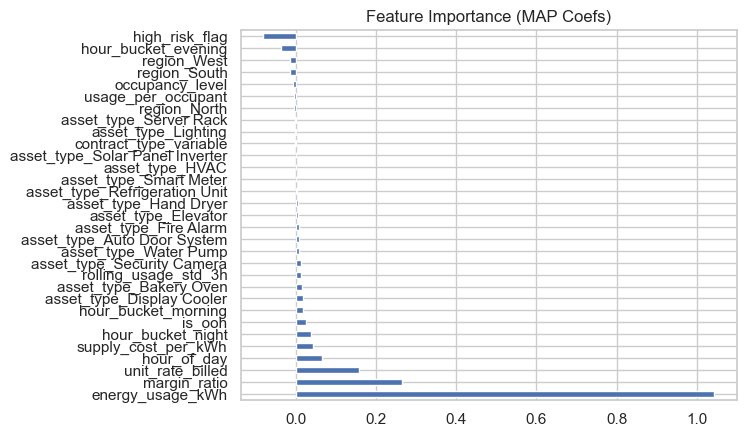

In [79]:
# Viewing Feature Importances

feature_importance = pd.Series(coefs_map, index=X_train.columns)
feature_importance.sort_values(ascending=False).plot(kind='barh', title="Feature Importance (MAP Coefs)")


In [80]:
# Calculating Predictions

import numpy as np

# Convert coefficients and intercept
coefs = map_estimate["coefs"]
intercept = map_estimate["intercept"]

# Predict using linear combination
y_pred = X_test @ coefs + intercept

# Convert to numpy array if needed
y_pred = np.array(y_pred)

# Show predictions
print("Predictions:", y_pred[:10])


Predictions: [34.270745770426956 73.74623867390255 35.55813602241187 32.682143655924186
 50.01751685433547 122.31488915079153 18.91509603033233 28.241469123044673
 55.03053197752699 42.39081295833461]


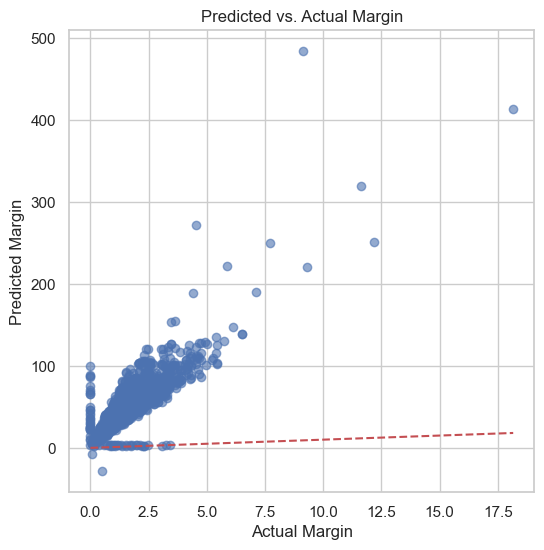

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Margin')
plt.ylabel('Predicted Margin')
plt.title('Predicted vs. Actual Margin')
plt.grid(True)
plt.show()


In [82]:
# Saving the Model
import pickle

# Save your model, coefficients, scaler, and feature names
with open("bayesian_model.pkl", "wb") as f:
    pickle.dump({
        "map_estimate": map_estimate,
        "scaler": scaler,
        "feature_columns": X_train.columns.tolist(),
        "coefs": map_estimate["coefs"],
        "intercept": map_estimate["intercept"]
    }, f)
    
print("Model and metadata saved to bayesian_model.pkl")

Model and metadata saved to bayesian_model.pkl


In [83]:
# Loading the saved model
import pickle

#Load the model and metadata
with open("bayesian_model.pkl", "rb") as f:
    model_data = pickle.load(f)
    
map_estimate = model_data["map_estimate"]
scaler = model_data["scaler"]
feature_columns = model_data["feature_columns"]
coefs = model_data["coefs"]
intercept = model_data["intercept"]

print("Model and components loaded successfully.")

Model and components loaded successfully.


In [84]:
# Preparing the input data and making predictions
import pandas as pd
import numpy as np

#Use few rows from X_test as a demo input
sample_input = X_test.copy().iloc[:10]    # or replace with your own new data

# Scale using the loaded scaler
sample_scaled = scaler.transform(sample_input[feature_columns])

# Convert to numpy array if needed
sample_scaled = np.array(sample_scaled)

# Predict using Linear formula: prediction = intercept + dot(features, coefs)
predictions = intercept + np.dot(sample_scaled, coefs)

# Display Predictions
print("Predictions:")
for i, pred in enumerate(predictions):
    print(f"Sample {i + 1}: Predicted Margin = {pred:.2f}")

Predictions:
Sample 1: Predicted Margin = 1.45
Sample 2: Predicted Margin = 2.41
Sample 3: Predicted Margin = 1.13
Sample 4: Predicted Margin = 0.73
Sample 5: Predicted Margin = 1.22
Sample 6: Predicted Margin = 3.76
Sample 7: Predicted Margin = 0.86
Sample 8: Predicted Margin = 1.22
Sample 9: Predicted Margin = 1.77
Sample 10: Predicted Margin = 1.54


In [85]:
# Saving the predictions to csv
import pandas as pd

# Assuming X_test is your test set and predictions are stored in y_pred
# If not already in DataFrame, convert prediction to Dataframe
pred_df = X_test.copy()
pred_df['predicted_margin'] = y_pred

# Optional: reset index and inspect the head
pred_df = pred_df.reset_index(drop = True)
print(pred_df.head())

# Save to csv
pred_df.to_csv("predicted_margins.csv", index = False)
print("Predictions saved to predicted_margins.csv")

   hour_of_day  is_ooh  energy_usage_kWh  occupancy_level  \
0           22       1         29.902586         0.775378   
1            9       0         68.875935         0.625091   
2           23       1         31.470924         0.406413   
3           10       0         29.227249         0.634303   
4           12       0         45.915778         0.511086   

   supply_cost_per_kWh  unit_rate_billed  usage_per_occupant  margin_ratio  \
0             0.110597          0.159203           38.515508      0.439477   
1             0.101083          0.141564          110.009476      0.400468   
2             0.082876          0.117658           77.245788      0.419693   
3             0.087748          0.108879           46.005239      0.240818   
4             0.089808          0.111138           89.664210      0.237505   

   rolling_usage_std_3h  high_risk_flag  ...  asset_type_Refrigeration Unit  \
0             21.649951               0  ...                          False   
1     

In [88]:
# Uploading the CSV file to Azure Blob Storage
from azure.storage.blob import BlobServiceClient

# Azure Details
connect_str = "Your-Azure-Connection_String"
container_name = "Your-Created_Container_Name"
blob_name = "predicted_margins.csv"

# Setup Client
blob_service_client = BlobServiceClient.from_connection_string(connect_str)
blob_client = blob_service_client.get_blob_client(container = container_name, blob = blob_name)

# Upload File
with open("predicted_margins.csv", "rb") as data:
    blob_client.upload_blob(data, overwrite = True)
    
print("File uploaded to Azure Blob Storage.")  

File uploaded to Azure Blob Storage.
